# The "Right Stuff"

Author: **Makenzi Fischbach and Trevor Zou**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.## Introduction

In [14]:
%load_ext autoreload
%autoreload 2

import functions as f
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

In the introduction, you should aim to tell the reader what your project is about. In doing so, you should answer the following questions:

What is the question you are trying to answer or the story that you are trying you tell?
Why is this question or story important?
What were the main steps your project made towards answering the question or telling the story?

We like astronauts anda compelling stories. We decided to look at astronauts through the years to know more about astronauts.

## Method

In the methodology, you should explain how you obtained, processed, and summarized or visualized the data. In doing so, you should answer the following questions:

Where did you get your data from?
How did you get this data (i.e., did you programmatically download it or did you access it through an API)?
How did you store and/or process this data (e.g., did you store and process it in Pandas)?
What information did you get from this data that you used in the presentation of your results?

### Getting the data
First we looked around the internet for public data on astronauts throughout the years. We found a database on Kaggle that was published by the National Aeronautics and Space Administration as the "Astronaut Fact Book" in 2013. It had a lot of information about each astronauts Birthdat, Gender, Status, Educational Background, and flight information. Once we found the data we needed a way to programmatically collect it, so we used the Kaggle API, which can download datasets from Kaggle through Python. We installed the API, created an API token with our API credentials, and downloaded the zip fie containng the .csv file with our data. We then imported the zip module to unzip the data and store it locally. We also imported several different modules to help us interact with and visualize the data, such as matplotlib, pandas, itertools, numpy, and math.

In [15]:
nasa_astronaut_dataset = f.get_data()

nasa_astronaut_dataset["State"] = nasa_astronaut_dataset["Birth Place"].str[-2:]

nasa_astronaut_dataset.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,CA
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,MT
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,NY
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,NJ


Here is the head of the csv. Note that are several cells with NaN. We looked into it and it seems like the people who were not part of an official nasa astronaut group, or were rather indiciduals selected byt eh research community, a company (ex. Lockheed Marten for Loren W. Acton) or non-NASA astronauts designated by international partners. This new rule change happened until 1965.

Our first interaction with the data: we decided to change the birth date and add the age they space-ed. in order to get a better sense of how old these people were when they went into space.

In [16]:
nasa_astronaut_dataset = f.change_dates(nasa_astronaut_dataset)

nasa_astronaut_dataset[["Name", "Year", "Birth Date", "Selection Age"]]

,Name,Year,Birth Date,Selection Age
0,Joseph M. Acaba,2004.0,1967.0,37.0
1,Loren W. Acton,NaN,1936.0,NaN
2,James C. Adamson,1984.0,1946.0,38.0
3,Thomas D. Akers,1987.0,1951.0,36.0
4,Buzz Aldrin,1963.0,1930.0,33.0
...,...,...,...,...
352,David A. Wolf,1990.0,1956.0,34.0
353,Neil W. Woodward III,1998.0,1962.0,36.0
354,Alfred M. Worden,1966.0,1932.0,34.0
355,John W. Young,1962.0,1930.0,32.0


Once we had that, we started to look at some general trends and cool facts across all of the astronauts, regardless of time.

We first wanted to look at the most noteable feats among astronuats:


In [17]:
print(f.highest(nasa_astronaut_dataset, "Space Flight (hr)"))
print(f.highest(nasa_astronaut_dataset, "Space Walks (hr)"))

Jeffrey N. Williams has the most Space Flight (hr) with a total of 12818 hours.
Michael E. Lopez-Alegria has the most Space Walks (hr) with a total of 67.0 hours.


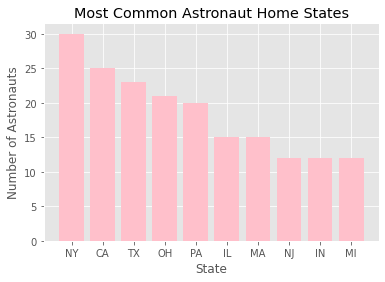

In [18]:
f.most_common_state(nasa_astronaut_dataset)

We also looked whhere astronauts came from, with the most popular states being New York and California.

We also wanted to look at what colleges astronauts came from as far as education back. They came from alot of different colleges, so we decided to show the top 10.

In [19]:
new = f.frequency(nasa_astronaut_dataset, 7)
f.tops(new,1000)

{'US Naval Academy': 52,
 'US Air Force Academy': 38,
 'MIT': 36,
 'US Naval Postgraduate School': 32,
 'Purdue University': 23,
 'Stanford University': 22,
 'US Military Academy': 18,
 'University of Colorado': 16,
 'Georgia Institute of Technology': 14,
 'University of Texas': 13,
 'University of Washington': 11,
 'California Institute of Technology': 11,
 'University of Southern California': 10,
 'Cornell University': 9,
 'University of California-Berkeley': 8,
 'University of Houston': 8,
 'Harvard University': 7,
 'George Washington University': 7,
 'Rice University': 7,
 'University of Virginia': 7,
 'University of Michigan': 7,
 'University of Arizona': 6,
 'Air Force Institute of Technology': 6,
 'University of Tennessee': 6,
 'University of Houston-Clear Lake': 6,
 'Columbia University': 6,
 'University of California-Los Angeles': 6,
 'Auburn University': 6,
 'US Air Force Institute of Technology': 6,
 'Princeton University': 5,
 'University of Florida': 5,
 'University of Ill

Alot of people came from the army, as well as MIT! WOW!

We could do the same thing with undergraduate major.

In [20]:
new = f.frequency(nasa_astronaut_dataset,8)

f.tops(new, 10)

{'Physics': 36,
 'Aerospace Engineering': 33,
 'Mechanical Engineering': 31,
 'Aeronautical Engineering': 29,
 'Electrical Engineering': 24,
 'Engineering Science': 13,
 'Engineering': 12,
 'Mathematics': 12,
 'Chemistry': 12,
 'Chemical Engineering': 9}

In [21]:
f.engineer(nasa_astronaut_dataset)

36.144578313253014 %of Astronauts majored in some kind of Engineering


We see that alot of people majored in phsyics! WOW! And that alot of people majored in engineering!

We also wanted to look at how many people went to grad school.

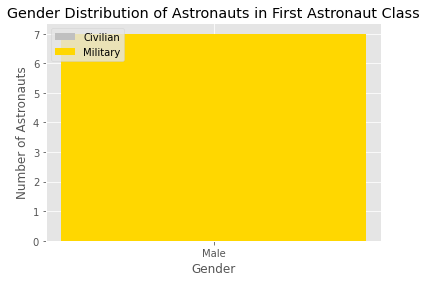

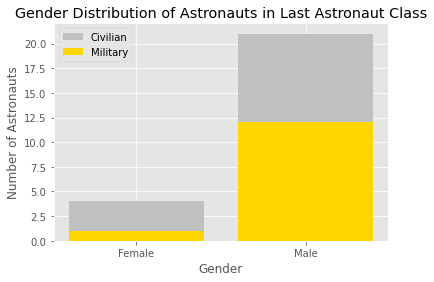

In [22]:
f.first_v_last(nasa_astronaut_dataset)

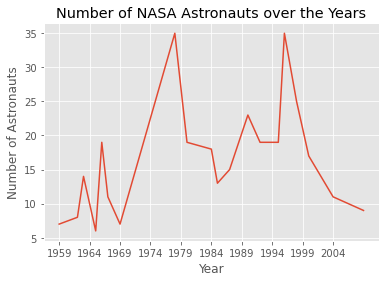

In [23]:
f.plot_astronauts_vs_time(nasa_astronaut_dataset)

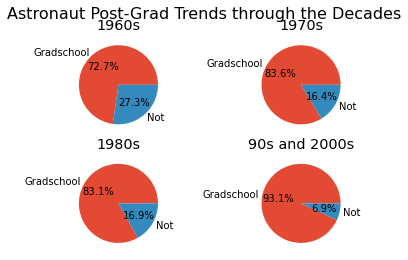

In [24]:
f.grad_school_over_time(nasa_astronaut_dataset)

We see that the educational side of astronauts goes higher over time, maybe having to do with 

This then lead us to think about how astronauts have changed over time
We then wanted to look first at how the number of astronauts has changed over time.

Interesting. Probably has to do with politics or some shit! Interesting feature is the jump in astronaut numbers and lull from 1969 to 1979

In [45]:
(nasa_astronaut_dataset["Selection Age"]).mean()


34.53333333333333

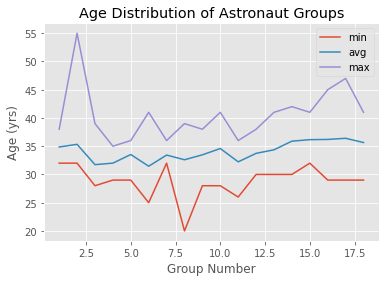

In [55]:
f.average_age_vs_group(nasa_astronaut_dataset)

Interestgly, the average age has a slight dip where apollo missions took place and they were desperate for young pilots.

In [56]:
deaths = f.frequency(nasa_astronaut_dataset, 18)
print(f.tops(deaths,3))

death_dates = f.frequency(nasa_astronaut_dataset, 17)
print(f.tops(death_dates,4))

{'STS 51-L (Challenger)': 7, 'STS-107 (Columbia)': 6, 'Apollo 1': 3}
{'1/28/1986': 7, '2/1/2003': 6, '1/27/1967': 3, '2/28/1966': 2}


The frequency of death date allows us to see which missions went wrong, and these corresponded to the apollo 1, challenger, columbia, and a project gemini jet crash. But, when we look at death dates, there is one more that pops up, and that is the project gemini crash

## Results

In the results, you should show the main summaries or visualizations of your data, along with any accompanying information. In doing so, you should answer the following questions:

What summaries or visualizations did you create?
What are the interesting and/or important parts of these summaries or visualizations?
How do these results answer your questions or tell your story?

## Conclusion

In the conclusion, you should provide key takeaways for the reader. In doing so, you should answer the following questions, where applicable:

What are the important insights that the reader should get from this project?
What are the contextual or ethical implications of your topic or work?
What lessons did you learn as you did the project?
What were the most difficult, challenging, or frustrating parts of the project?
In what ways would you extend or change your project if you had more time?